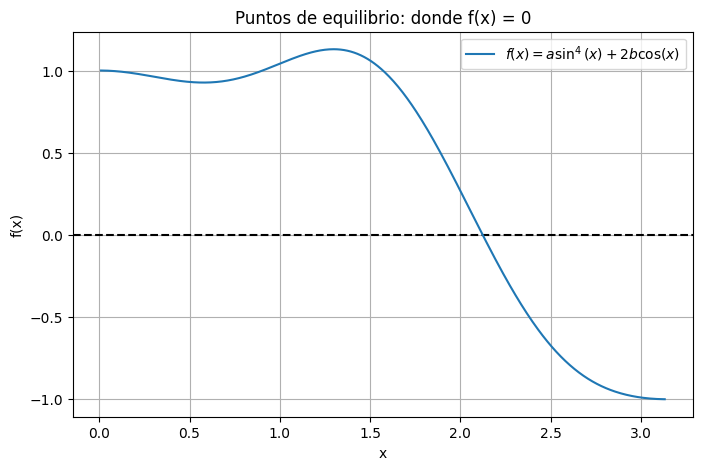

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del potencial
a = 1.0   # Cambiar según sea necesario
b = 0.5   # Cambiar según sea necesario

# Definir la función de equilibrio
def f(x):
    return a * np.sin(x)**4 + 2 * b * np.cos(x)

# Rango para x (evitando 0 y pi)
x = np.linspace(0.01, np.pi - 0.01, 500)

# Graficar
plt.figure(figsize=(8,5))
plt.axhline(0, color='k', linestyle='--')
plt.plot(x, f(x), label=r'$f(x) = a \sin^4(x) + 2b \cos(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Puntos de equilibrio: donde f(x) = 0')
plt.legend()
plt.grid(True)
plt.show()


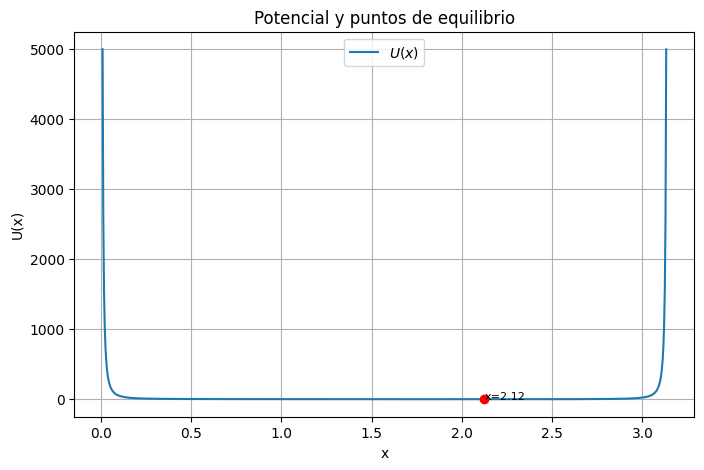

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parámetros del potencial
a = 1.0   # Cambia estos valores si es necesario
b = 0.5

# Definir potencial y su derivada
def U(x):
    return a * np.cos(x) + b / (np.sin(x)**2)

def dUdx(x):
    return -a * np.sin(x) - (2*b*np.cos(x))/(np.sin(x)**3)

# Intervalo de x evitando singularidades (0, pi)
x = np.linspace(0.01, np.pi-0.01, 800)

# Encontrar raíces de dU/dx = 0 (puntos de equilibrio)
# Supongamos que pueden haber hasta 5 raíces, probamos distintas condiciones iniciales
roots = []
initial_guesses = np.linspace(0.2, np.pi-0.2, 10)
for guess in initial_guesses:
    try:
        r = fsolve(dUdx, guess)[0]
        # Filtrar raíces repetidas y evitar extremos
        if 0.01 < r < np.pi-0.01 and all(abs(r - rt) > 1e-2 for rt in roots):
            roots.append(r)
    except:
        pass

# Graficar potencial
plt.figure(figsize=(8,5))
plt.plot(x, U(x), label=r'$U(x)$')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.title('Potencial y puntos de equilibrio')
plt.grid(True)

# Marcar puntos de equilibrio
for r in roots:
    plt.plot(r, U(r), 'ro')
    plt.text(r, U(r), f"x={r:.2f}", fontsize=8, ha='left')

plt.legend()
plt.show()


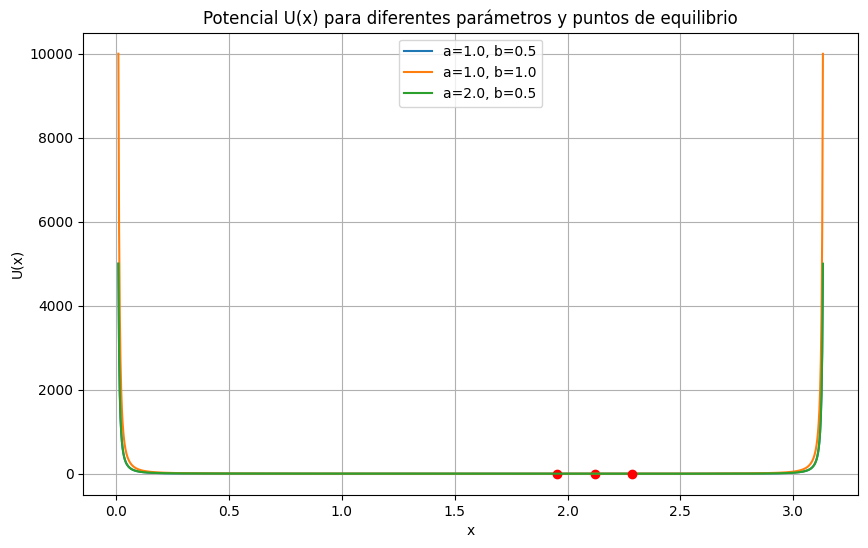

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Rango amplio para x, evitando singularidades (0, pi)
x = np.linspace(0.01, np.pi-0.01, 1000)

# Conjunto de parámetros para comparar
param_sets = [
    (1.0, 0.5),
    (1.0, 1.0),
    (2.0, 0.5)
]

plt.figure(figsize=(10,6))

for a, b in param_sets:
    def U(x):  # Potencial
        return a * np.cos(x) + b / (np.sin(x)**2)

    def dUdx(x):  # Derivada
        return -a * np.sin(x) - (2*b*np.cos(x))/(np.sin(x)**3)

    # Encontrar raíces de dU/dx = 0
    roots = []
    initial_guesses = np.linspace(0.2, np.pi-0.2, 15)
    for guess in initial_guesses:
        try:
            r = fsolve(dUdx, guess)[0]
            if 0.01 < r < np.pi-0.01 and all(abs(r - rt) > 1e-2 for rt in roots):
                roots.append(r)
        except:
            pass

    # Graficar potencial
    plt.plot(x, U(x), label=f"a={a}, b={b}")

    # Marcar puntos de equilibrio
    for r in roots:
        plt.plot(r, U(r), 'ro')

plt.xlabel("x")
plt.ylabel("U(x)")
plt.title("Potencial U(x) para diferentes parámetros y puntos de equilibrio")
plt.legend()
plt.grid(True)
plt.show()
